# SQL Task 

In [1]:
# Importing the required libraries

import sqlite3
import pandas as pd
import numpy as np

In [2]:
# Read the code below and write your observation in the next cell

conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())

cursor.execute("PRAGMA table_info('Salaries')")
cols = cursor.fetchall()
for col in cols:
    print(col[1])

[('Salaries',)]
Id
EmployeeName
JobTitle
BasePay
OvertimePay
OtherPay
Benefits
TotalPay
TotalPayBenefits
Year
Notes
Agency
Status


### Read the code above. Write observations here, i.e. what the code is trying to do..

- `sqlite3` is build the connection with database.
- `cursor` in SQL is a temporary work area created in system memory when a SQL statement is executed. A SQL cursor is a set of rows together with a pointer that identifies a current row. It is a database object to retrieve data from a result set one row at a time.

In [3]:
# Reading the data from database and storing it in the dataframe

df = pd.read_sql_query("""SELECT * FROM Salaries""", conn)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


## Q_sample: Who is getting the maximum salary?

In [4]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT MAX(TotalPay) FROM Salaries""", conn)
output

,MAX(TotalPay)
0,567595.43


In [5]:
# Pandas Implementation - 1

max(df.TotalPay)

567595.43

In [6]:
# Pandas Implementation - 2
# Syntax - dataframe.loc[row, index]

df.loc[df.TotalPay == max(df.TotalPay), ['TotalPay']]

,TotalPay
0,567595.43


<h3>
If you observe the above output, it is giving the maximum salary. 

Inorder to understand who is getting the maximum salary look at the next cell. 

Also try to map Pandas .loc syntax with the SQL SELECT Query.
</h3>

In [7]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT * 
                            FROM Salaries 
                            WHERE TotalPay = (SELECT MAX(TotalPay) FROM Salaries)""", conn)
output

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,


In [8]:
# Pandas Implementation

df.loc[df.TotalPay == max(df.TotalPay)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,


___________

____________

**1.Retrieve the top 8 rows from the table**

In [9]:
# sql
for row in cursor.execute('''SELECT * FROM  Salaries LIMIT 8'''):
    print(row)

(1, 'NATHANIEL FORD', 'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY', 167411.18, 0, 400184.25, '', 567595.43, 567595.43, 2011, '', 'San Francisco', '')
(2, 'GARY JIMENEZ', 'CAPTAIN III (POLICE DEPARTMENT)', 155966.02, 245131.88, 137811.38, '', 538909.28, 538909.28, 2011, '', 'San Francisco', '')
(3, 'ALBERT PARDINI', 'CAPTAIN III (POLICE DEPARTMENT)', 212739.13, 106088.18, 16452.6, '', 335279.91, 335279.91, 2011, '', 'San Francisco', '')
(4, 'CHRISTOPHER CHONG', 'WIRE ROPE CABLE MAINTENANCE MECHANIC', 77916, 56120.71, 198306.9, '', 332343.61, 332343.61, 2011, '', 'San Francisco', '')
(5, 'PATRICK GARDNER', 'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)', 134401.6, 9737, 182234.59, '', 326373.19, 326373.19, 2011, '', 'San Francisco', '')
(6, 'DAVID SULLIVAN', 'ASSISTANT DEPUTY CHIEF II', 118602, 8601, 189082.74, '', 316285.74, 316285.74, 2011, '', 'San Francisco', '')
(7, 'ALSON LEE', 'BATTALION CHIEF, (FIRE DEPARTMENT)', 92492.01, 89062.9, 134426.14, '', 315981.05, 315981.05, 2011, ''

In [10]:
# sql 2

pd.read_sql_query('''SELECT * FROM  Salaries LIMIT 8''',conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,,307899.46,307899.46,2011,,San Francisco,


In [11]:
df.head(8)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,,307899.46,307899.46,2011,,San Francisco,


**2.What is the average TotalPay?**

In [12]:
# SQLite Implementation

pd.read_sql_query("""SELECT AVG(TotalPay) FROM Salaries""", conn)

,AVG(TotalPay)
0,74768.321972


In [13]:
# Pandas Implementation 1
sum(df['TotalPay']/len(df))

74768.32197169248

In [14]:
df.TotalPay.mean()

74768.321971703

**What is the highest amount of BasePay in the dataset?**

In [15]:
output = pd.read_sql_query("""SELECT MAX(BasePay) FROM Salaries WHERE BasePay !='Not Provided' AND BasePay != ''""", conn)
output

,MAX(BasePay)
0,319275.01


df.loc[max(df['BasePay']!='Not Provided'or'')]

In [16]:
df['BasePay'].replace(to_replace ="Not Provided",value =np.nan,inplace= True) 
df['BasePay']=pd.to_numeric(df['BasePay'])

In [17]:
max(df['BasePay'])

319275.01

**4.What is the Job title of 'NATHANIEL FORD'?**

In [18]:
pd.read_sql_query('''SELECT JobTitle FROM Salaries WHERE EmployeeName='NATHANIEL FORD' ''',conn)

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


In [19]:
df['JobTitle'][df['EmployeeName']=='NATHANIEL FORD']

0    GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
Name: JobTitle, dtype: object

**5.How much 'TotalPayBenefits' is made by 'NATHANIEL FORD'?**

In [20]:
pd.read_sql_query('''SELECT TotalPayBenefits FROM Salaries WHERE EmployeeName='NATHANIEL FORD' ''',conn)

,TotalPayBenefits
0,567595.43


In [21]:
df['TotalPayBenefits'][df['EmployeeName'] == 'NATHANIEL FORD']

0    567595.43
Name: TotalPayBenefits, dtype: float64

**6.What was the average (mean) TotalPay of all employees per year? (Output for each year from 2011 to 2014 separately)**

In [22]:
pd.read_sql_query("""SELECT AVG(TotalPay), Year FROM Salaries GROUP BY Year""", conn)

,AVG(TotalPay),Year
0,71744.103871,2011
1,74113.262265,2012
2,77611.443142,2013
3,75463.918140,2014


In [23]:
df_year = df.groupby('Year')
df_year['TotalPay'].mean()

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

**7.How many unique jobs are there?**

In [24]:
pd.read_sql_query('''SELECT COUNT(DISTINCT JobTitle) FROM Salaries''',conn)

,COUNT(DISTINCT JobTitle)
0,2159


In [25]:
df['JobTitle'].nunique()

2159

**8.What are the top 5 most common jobs?**

In [26]:
pd.read_sql_query('''SELECT JobTitle, COUNT(JobTitle) AS value_occurrence FROM Salaries GROUP BY `JobTitle`
    ORDER BY `value_occurrence` DESC
    LIMIT    5''',conn)

,JobTitle,value_occurrence
0,Transit Operator,7036
1,Special Nurse,4389
2,Registered Nurse,3736
3,Public Svc Aide-Public Works,2518
4,Police Officer 3,2421


In [27]:
df.loc[:,'JobTitle'].value_counts()[:6]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
Name: JobTitle, dtype: int64

**9.How many people have the word Chief in their job title?**

In [28]:
pd.read_sql_query("""SELECT COUNT(JobTitle) FROM Salaries WHERE JobTitle LIKE ('%chief%') """, conn)

,COUNT(JobTitle)
0,627


In [91]:
j= 0
for i in df.loc[:,'JobTitle']:
    if 'Chief' in i or 'CHIEF' in i:
        j +=1
print(j)

624


In [90]:
df['JobTitle'].apply(lambda str:('chief' in str.lower())).sum()

624

______________

_______________

## EDA

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737,182235,,326373.19,326373.19,2011,,San Francisco,


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            148654 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               148654 non-null object
Agency              148654 non-null object
Status              148654 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [33]:
df.shape

(148654, 13)

> - In the given dataset has 148654 row and 13 columns.
- From these 13 attributes three are five are numerical and eight are object type.

**Ckecking Duplicates**

In [34]:
df[df.duplicated()].count()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

> There is no duplicated rows are present.

**In the dataset some values are not provided so i have to replace that values with NaN values**

In [35]:
df.replace(['Not provided',''],np.nan,inplace=True)

**Checking null values**

In [36]:
round((df.isnull().sum()/len(df))*100,3)

Id                    0.000
EmployeeName          0.003
JobTitle              0.003
BasePay               0.410
OvertimePay           0.000
OtherPay              0.000
Benefits             24.324
TotalPay              0.000
TotalPayBenefits      0.000
Year                  0.000
Notes               100.000
Agency                0.000
Status               74.357
dtype: float64

- By checking Null values we know that some columns have null values.
- The note attribute doen't have any value
- status has 74.357 %
- Benefits has 24.324 %
- EmployeeName, Jobtitle has 0.003

- Note Doesn't had any values so droping the note column.
- Status has 74.35 % so most of the data is missing if we immpute that column with mode that may will miss lead the data, so droping the Status attribute.

In [37]:
df.drop(labels=['Notes','Status'],axis=1,inplace=True)

- Null values 


>EmployeeName          0.003%
JobTitle              0.003%
BasePay               0.407%
- So i remove those rows

In [38]:
df['Agency'].unique()

array(['San Francisco'], dtype=object)

In [39]:
df.drop(labels='Agency',axis=1,inplace=True)

- Agency attribute have single value for entier rows so that will be dropped

In [40]:
df = df[~df['BasePay'].isnull()]
df = df[~df['EmployeeName'].isnull()]

In [41]:
round((df.isnull().sum()/len(df))*100,3)

Id                   0.000
EmployeeName         0.000
JobTitle             0.000
BasePay              0.000
OvertimePay          0.000
OtherPay             0.000
Benefits            24.424
TotalPay             0.000
TotalPayBenefits     0.000
Year                 0.000
dtype: float64

In [42]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

- BasePay,OvertimePay,OtherPay,Benefits These attributes are basically numerical values but showing like object.

In [43]:
df['BasePay'] = pd.to_numeric(df['BasePay'])
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'])
df['OtherPay'] = pd.to_numeric(df['OtherPay'])
df['Benefits'] = pd.to_numeric(df['Benefits'])

In [44]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

In [45]:
### Univariate Analysis

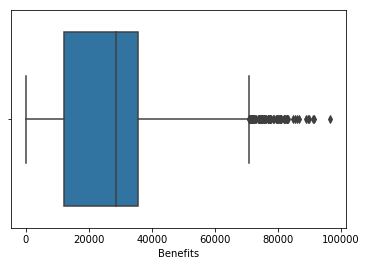

In [46]:
sns.boxplot(df['Benefits'])

- Benefits attribute has many extreem values because of this values mean will effect , mean drag to right bacuse of extreem points.
- So nan values will be immputed by median value.

In [47]:
df['Benefits'].median()

28697.845

In [48]:
df['Benefits'].fillna(df['Benefits'].median(),inplace=True)

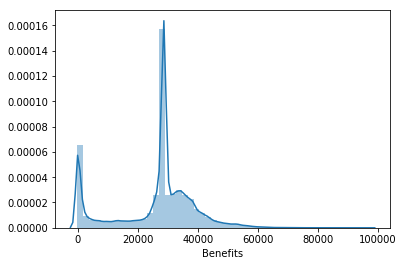

In [49]:
sns.distplot(df['Benefits'])
plt.show()

- Plot after replacing nan values.

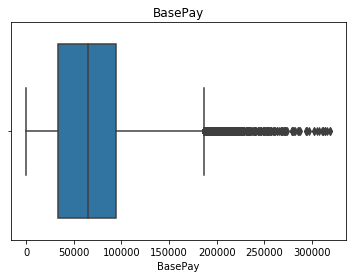

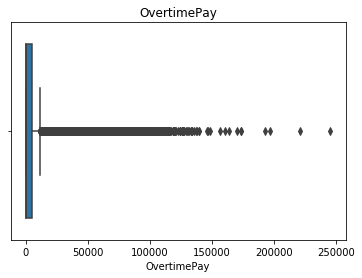

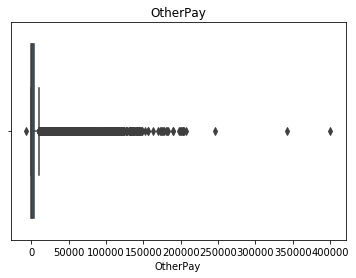

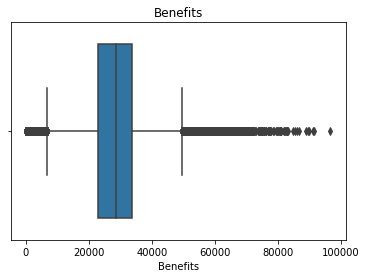

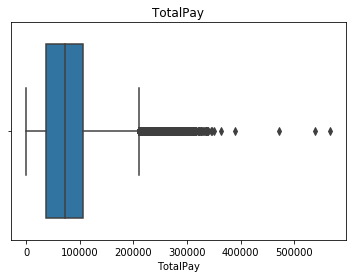

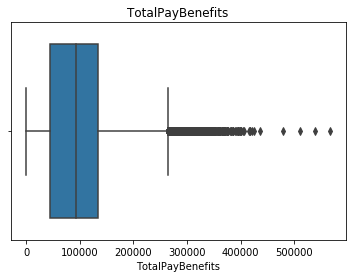

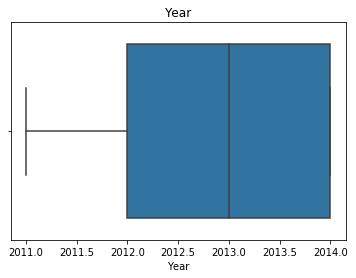

In [50]:
for col in df.select_dtypes(exclude='object').columns[1:]:
    sns.boxplot(x=col,data=df)
    plt.title(col)
    plt.show()

- Base Pay:
    - Base pay has extreem values
- Overtime Pay:
    - most of the values present nearer to zero.
    
- Other Pay:
    - Most of the values in other pay have at zero.

- Benefits:
    - Benefits have extreem values at both sides. 
    
- Total Pay:
    - Total pay have extreem values to the right side of mean.
    
- TotalPayBenefits:
    - Total pay benefits have extreem values to the right side of mean.
    
- Year :
    - In Year 50% of years are 2012 to 2014

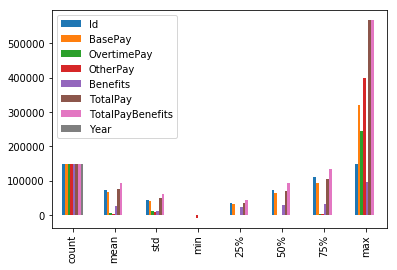

In [51]:
df.describe().plot(kind='bar')
plt.show()

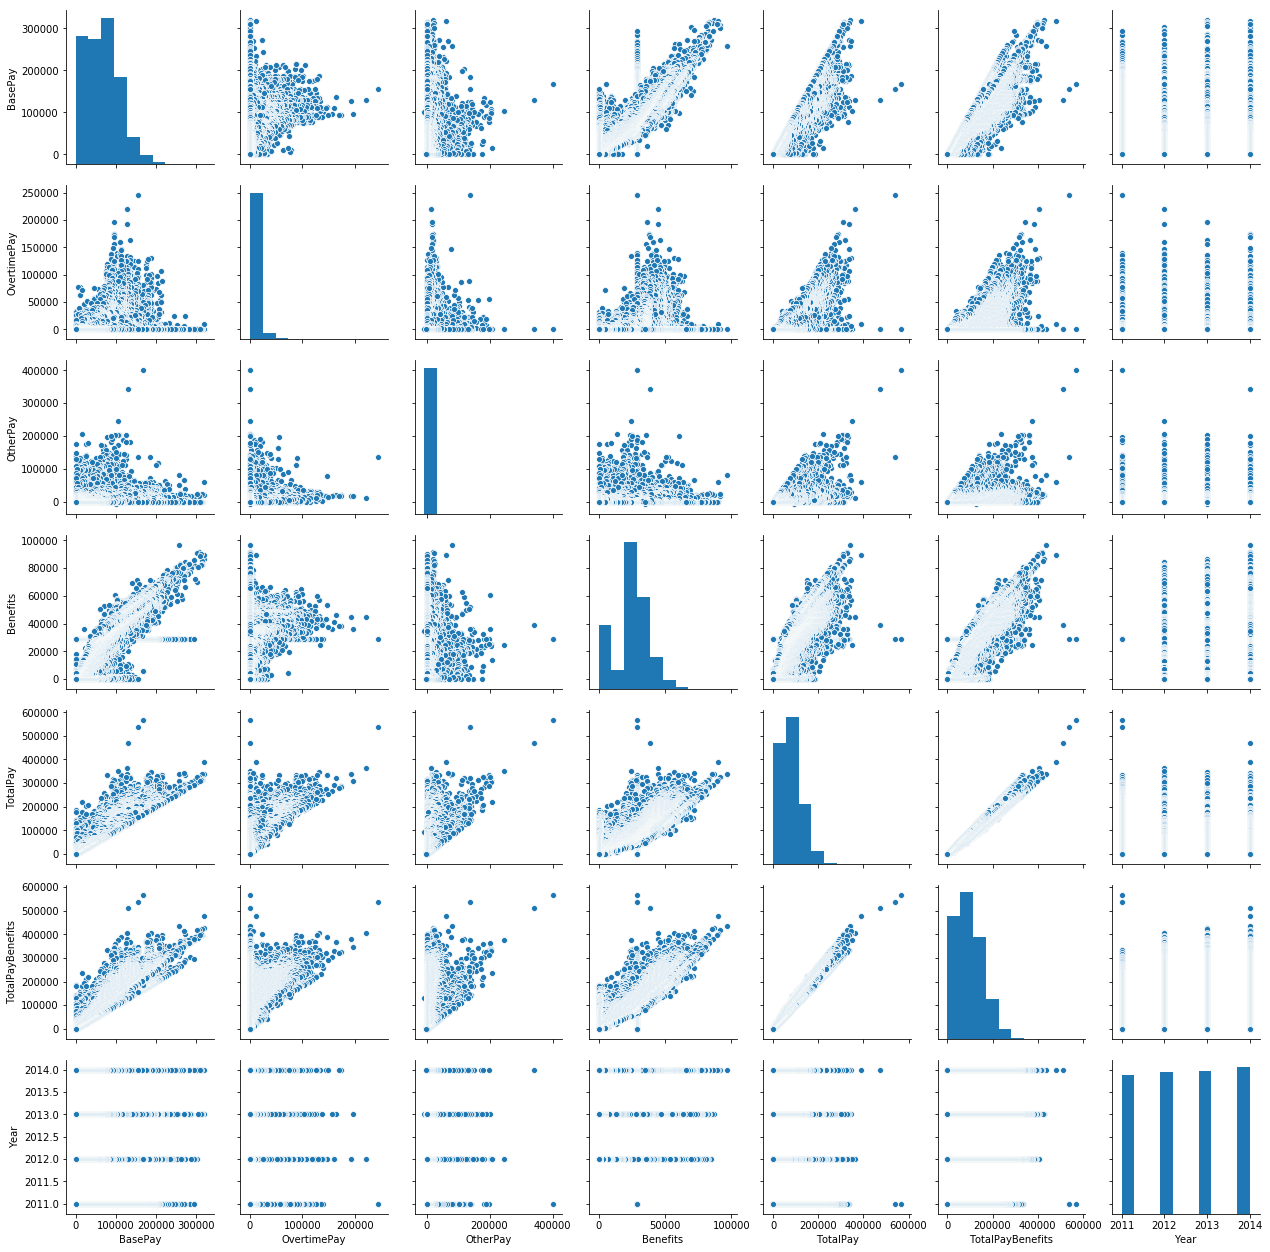

In [52]:
sns.pairplot(df.iloc[:,1:])
plt.show()

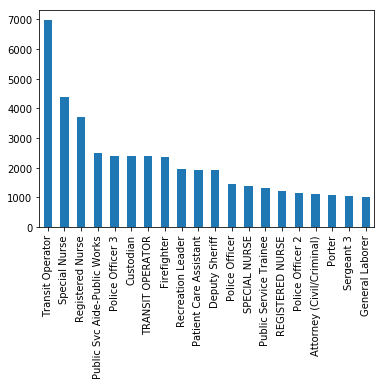

In [62]:
df.JobTitle.value_counts().nlargest(20).plot(kind='bar')
plt.show()

- From the plot `Transit Operator`s are more.

In [63]:
### Bivariate Analysis

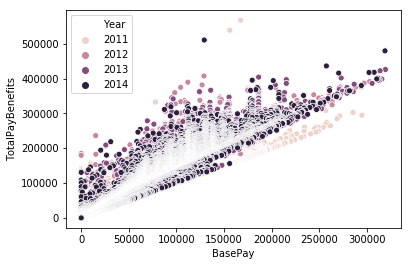

In [67]:
sns.scatterplot(x='BasePay',y='TotalPayBenefits',hue='Year',data=df)
plt.show()

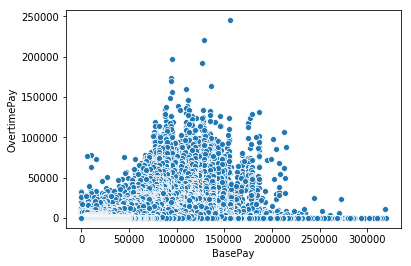

In [68]:
sns.scatterplot(x='BasePay',y='OvertimePay',data=df)
plt.show()

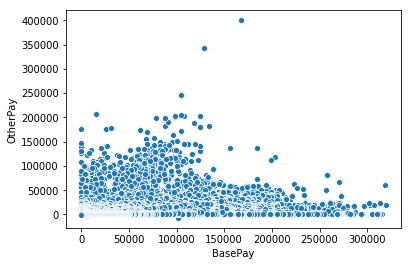

In [66]:
sns.scatterplot(x='BasePay',y='OtherPay',data=df)
plt.show()

In [69]:
grp = df.groupby('Year')

In [ ]:
grp.aggregate(['max','mean','min'])

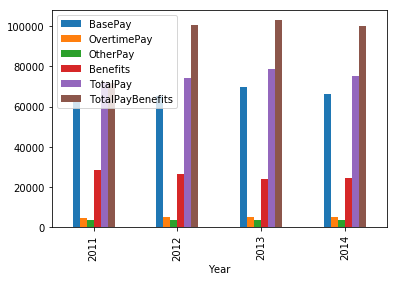

In [80]:
grp.mean().iloc[:,1:].plot(kind='bar')

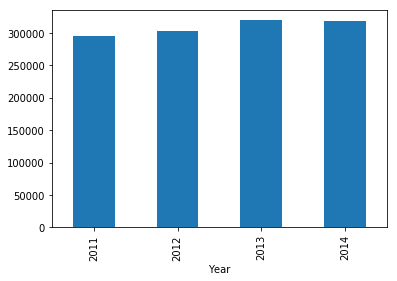

In [86]:
grp.max()['BasePay'].plot(kind='bar')
plt.show()

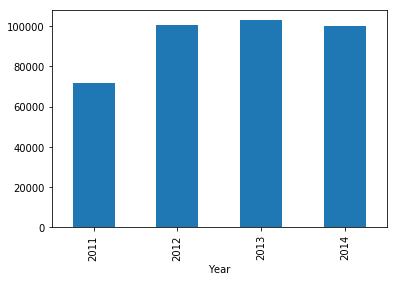

In [87]:
grp.mean()['TotalPayBenefits'].plot(kind='bar')
plt.show()

**Five most common jobs**

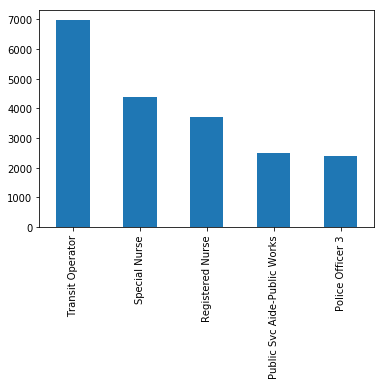

In [88]:
df.JobTitle.value_counts().head().plot(kind='bar')
plt.show()

________________________

_______________________